<a href="https://colab.research.google.com/github/John1Tang/ML-000/blob/main/Week13/find_param_with_lgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task

找到至少 1 个能够提升模型效果的衍生变量（以 lightgbm 为基础模型）。

附件里是作业要用到的数据集，其中 loan_status 是 y 值

In [ ]:
!pip install lightgbm==3.1 --install-option=--gpu

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 757kB 6.6MB/s 
Skipping wheel build for lightgbm, due to binaries being disabled for it.
  Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
    Running setup.py install for lightgbm ... done


### import

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

### Load Data

In [ ]:
train = pd.read_csv('drive/MyDrive/final/train_final.csv', engine='python')
test = pd.read_csv('drive/MyDrive/final/test_final.csv', engine='python')

### Metadata

In [ ]:
train.head()

,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,continuous_installment,continuous_int_rate,continuous_last_fico_range_high,continuous_last_fico_range_low,continuous_loan_amnt,loan_status,continuous_mths_since_last_delinq,continuous_mths_since_last_major_derog,continuous_mths_since_last_record,continuous_open_acc,continuous_pub_rec,discrete_addr_state_1_one_hot,discrete_addr_state_2_one_hot,discrete_addr_state_3_one_hot,discrete_addr_state_4_one_hot,discrete_addr_state_5_one_hot,discrete_addr_state_6_one_hot,discrete_addr_state_7_one_hot,discrete_addr_state_8_one_hot,discrete_addr_state_9_one_hot,discrete_addr_state_10_one_hot,discrete_addr_state_11_one_hot,discrete_addr_state_12_one_hot,discrete_addr_state_13_one_hot,discrete_addr_state_14_one_hot,discrete_addr_state_15_one_hot,discrete_addr_state_16_one_hot,discrete_addr_state_17_one_hot,discrete_addr_state_18_one_hot,discrete_addr_state_19_one_hot,...,discrete_purpose_11_one_hot,discrete_purpose_12_one_hot,discrete_pymnt_plan_1_one_hot,discrete_sub_grade_1_one_hot,discrete_sub_grade_2_one_hot,discrete_sub_grade_3_one_hot,discrete_sub_grade_4_one_hot,discrete_sub_grade_5_one_hot,discrete_sub_grade_6_one_hot,discrete_sub_grade_7_one_hot,discrete_sub_grade_8_one_hot,discrete_sub_grade_9_one_hot,discrete_sub_grade_10_one_hot,discrete_sub_grade_11_one_hot,discrete_sub_grade_12_one_hot,discrete_sub_grade_13_one_hot,discrete_sub_grade_14_one_hot,discrete_sub_grade_15_one_hot,discrete_sub_grade_16_one_hot,discrete_sub_grade_17_one_hot,discrete_sub_grade_18_one_hot,discrete_sub_grade_19_one_hot,discrete_sub_grade_20_one_hot,discrete_sub_grade_21_one_hot,discrete_sub_grade_22_one_hot,discrete_sub_grade_23_one_hot,discrete_sub_grade_24_one_hot,discrete_sub_grade_25_one_hot,discrete_sub_grade_26_one_hot,discrete_sub_grade_27_one_hot,discrete_sub_grade_28_one_hot,discrete_sub_grade_29_one_hot,discrete_sub_grade_30_one_hot,discrete_sub_grade_31_one_hot,discrete_sub_grade_32_one_hot,discrete_sub_grade_33_one_hot,discrete_sub_grade_34_one_hot,discrete_sub_grade_35_one_hot,discrete_term_1_one_hot,discrete_term_2_one_hot
0,55000.0,NaN,0.0,5.91,NaN,679.0,675.0,3600.0,3600.0,1.0,123.03,13.99,564.0,560.0,3600.0,1,30.0,30.0,NaN,7.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,65000.0,NaN,1.0,16.06,NaN,719.0,715.0,24700.0,24700.0,4.0,820.28,11.99,699.0,695.0,24700.0,1,6.0,NaN,NaN,22.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,63000.0,71000.0,0.0,10.78,13.85,699.0,695.0,20000.0,20000.0,0.0,432.66,10.78,704.0,700.0,20000.0,1,NaN,NaN,NaN,6.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,104433.0,NaN,1.0,25.37,NaN,699.0,695.0,10400.0,10400.0,3.0,289.91,22.45,704.0,700.0,10400.0,1,12.0,NaN,NaN,12.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,34000.0,NaN,0.0,10.20,NaN,694.0,690.0,11950.0,11950.0,0.0,405.18,13.44,759.0,755.0,11950.0,1,NaN,NaN,NaN,5.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Data Shape

In [ ]:
x_train = train.drop(columns=['loan_status'])
x_test = test.drop(columns=['loan_status'])

y_train = train[['loan_status']]
y_test = test[['loan_status']]

In [ ]:
train.shape

(50000, 146)

In [ ]:
train.shape[0] == sum(train['loan_status'].value_counts())

True

In [ ]:
train['loan_status'].value_counts()

1    39788
0    10212
Name: loan_status, dtype: int64

### LGB Verify

In [ ]:
train_dataset = lgb.Dataset(x_train, y_train)
test_dataset = lgb.Dataset(x_test, y_test)

In [ ]:
param = {'num_leaves': 31, 'objective': 'binary', 'metric':'binary_error'}
num_round = 50

In [ ]:
model = lgb.train(param, train_dataset, num_boost_round=num_round, valid_sets=[train_dataset, test_dataset])

[1]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[2]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[3]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[4]	training's binary_error: 0.20424	valid_1's binary_error: 0.19548
[5]	training's binary_error: 0.14838	valid_1's binary_error: 0.14168
[6]	training's binary_error: 0.112	valid_1's binary_error: 0.11048
[7]	training's binary_error: 0.099	valid_1's binary_error: 0.10016
[8]	training's binary_error: 0.09384	valid_1's binary_error: 0.09572
[9]	training's binary_error: 0.08812	valid_1's binary_error: 0.09036
[10]	training's binary_error: 0.08416	valid_1's binary_error: 0.08636
[11]	training's binary_error: 0.08172	valid_1's binary_error: 0.08476
[12]	training's binary_error: 0.08048	valid_1's binary_error: 0.08422
[13]	training's binary_error: 0.07882	valid_1's binary_error: 0.08354
[14]	training's binary_error: 0.07806	valid_1's binary_error: 0.0832
[15]	training's binary_error: 0.07

In [ ]:
lgb.cv(param, train_dataset, num_round, nfold=5)

{'binary_error-mean': [0.20424000000000003,
  0.20424000000000003,
  0.20424000000000003,
  0.20424000000000003,
  0.14848,
  0.1135,
  0.10152000000000001,
  0.09522000000000001,
  0.09058,
  0.08738,
  0.08548,
  0.08399999999999999,
  0.08266,
  0.08184,
  0.08158,
  0.08134,
  0.08112,
  0.08108,
  0.08126,
  0.08124,
  0.08127999999999999,
  0.08114,
  0.08114,
  0.08114,
  0.08106,
  0.08091999999999999,
  0.08092,
  0.08102000000000001,
  0.08109999999999999,
  0.08094000000000001,
  0.08112,
  0.08093999999999998,
  0.08096,
  0.08102000000000001,
  0.08118,
  0.08122,
  0.08112,
  0.08113999999999999,
  0.08120000000000001,
  0.08112,
  0.08109999999999999,
  0.08084,
  0.08091999999999999,
  0.08094,
  0.08096,
  0.08081999999999999,
  0.08092,
  0.08102000000000001,
  0.08098000000000001,
  0.08114],
 'binary_error-stdv': [4.898979485567176e-05,
  4.898979485567176e-05,
  4.898979485567176e-05,
  4.898979485567176e-05,
  0.0018925115587493824,
  0.003964341054954783,
  0.002

In [ ]:
import io
import multiprocessing
from contextlib import redirect_stdout
from copy import deepcopy
from dataclasses import dataclass, asdict
import hyperopt.pyll
from hyperopt import fmin, tpe, hp
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import torch

import copy
cpu_count = 4
use_gpu = False
@dataclass
class LGBOpt:
    num_threads: any = hp.choice('num_threads', [cpu_count])
    num_leaves: any = hp.choice('num_leaves', [64])
    metric: any = hp.choice('metric', ['binary_error'])
    num_round: any = hp.choice('num_rounds', [1000])
    objective: any = hp.choice('objective', ['binary'])
    learning_rate: any = hp.uniform('learning_rate', 0.01, 0.1)
    feature_fraction: any = hp.uniform('feature_fraction', 0.5, 1.0)
    bagging_fraction: any = hp.uniform('bagging_fraction', 0.8, 1.0)
    device_type: any = hp.choice('device_tpye', ['gpu']) if use_gpu else hp.choice('device_type',
                                                                                   ['cpu'])
    boosting: any = hp.choice('boosting', ['gbdt', 'dart', 'goss'])
    extra_trees: any = hp.choice('extra_tress', [False, True])
    drop_rate: any = hp.uniform('drop_rate', 0, 0.2)
    uniform_drop: any = hp.choice('uniform_drop', [True, False])
    lambda_l1: any = hp.uniform('lambda_l1', 0, 10)  # TODO: Check range
    lambda_l2: any = hp.uniform('lambda_l2', 0, 10)  # TODO: Check range
    min_gain_to_split: any = hp.uniform('min_gain_to_split', 0, 1)  # TODO: Check range
    min_data_in_bin = hp.choice('min_data_in_bin', [3, 5, 10, 15, 20, 50])

    @staticmethod
    def get_common_params():
        return {'num_thread': 4, 'num_leaves': 12, 'metric': 'binary', 'objective': 'binary',
                'num_round': 1000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}

In [ ]:
class FitterBase(object):
    def __init__(self, label, metric, max_eval=100, opt=None):
        self.label = label
        self.metric = metric
        self.opt_params = dict()
        self.max_eval = max_eval
        self.opt = opt

    def get_loss(self, y, y_pred):
        if self.metric == 'error':
            return 1 - accuracy_score(y, y_pred)
        elif self.metric == 'precision':
            return 1 - precision_score(y, y_pred)
        elif self.metric == 'recall':
            return 1 - recall_score(y, y_pred)
        elif self.metric == 'macro_f1':
            return 1 - f1_score(y, y_pred, average='macro')
        elif self.metric == 'micro_f1':
            return 1 - f1_score(y, y_pred, average='micro')
        elif self.metric == 'auc':  # TODO: Add a warning checking if y_predict is all [0, 1], it should be probability
            return 1 - roc_auc_score(y, y_pred)
        else:
            raise Exception("Not implemented yet.")

In [ ]:
class LGBFitter(FitterBase):
    def __init__(self, label='label', metric='error', opt: LGBOpt = None, max_eval=100):
        super(LGBFitter, self).__init__(label, metric, max_eval)
        if opt is not None:
            self.opt = opt
        else:
            self.opt = LGBOpt()
        self.best_round = None
        self.clf = None

    def train(self, train_df, eval_df, params=None, use_best_eval=True):
        self.best_round = None
        dtrain = lgb.Dataset(train_df.drop(columns=[self.label]), train_df[self.label])
        deval = lgb.Dataset(eval_df.drop(columns=[self.label]), eval_df[self.label])
        evallist = [dtrain, deval]
        if params is None:
            use_params = deepcopy(self.opt_params)
        else:
            use_params = deepcopy(params)

        num_round = use_params.pop('num_round')
        if use_best_eval:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            min_error = np.inf
            min_index = 0
            for idx in range(len(output) - 1):
                if len(output[idx].split("\t")) == 3:
                    temp = float(output[idx].split("\t")[2].split(":")[1])
                    if min_error > temp:
                        min_error = temp
                        min_index = int(output[idx].split("\t")[0][1:-1])
            print("The minimum is attained in round %d" % (min_index + 1))
            self.best_round = min_index + 1
            return output
        else:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            self.best_round = num_round
            return output

    def search(self, train_df, eval_df, use_best_eval=True):
        self.opt_params = dict()

        def train_impl(params):
            self.train(train_df, eval_df, params, use_best_eval)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            return self.get_loss(eval_df[self.label], y_pred)

        self.opt_params = fmin(train_impl, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def search_k_fold(self, k_fold, data, use_best_eval=True):
        self.opt_params = dict()

        def train_impl_nfold(params):
            loss = list()
            for train_id, eval_id in k_fold.split(data):
                train_df = data.loc[train_id]
                eval_df = data.loc[eval_id]
                self.train(train_df, eval_df, params, use_best_eval)
                if self.metric == 'auc':
                    y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
                else:
                    y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                               num_iteration=self.best_round) > 0.5).astype(int)
                loss.append(self.get_loss(eval_df[self.label], y_pred))
            return np.mean(loss)

        self.opt_params = fmin(train_impl_nfold, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def train_k_fold(self, k_fold, train_data, test_data, params=None, drop_test_y=True, use_best_eval=True):
        acc_result = list()
        train_pred = np.empty(train_data.shape[0])
        test_pred = np.empty(test_data.shape[0])
        if drop_test_y:
            dtest = test_data.drop(columns=self.label)
        else:
            dtest = test_data

        models = list()
        for train_id, eval_id in k_fold.split(train_data):
            train_df = train_data.loc[train_id]
            eval_df = train_data.loc[eval_id]
            self.train(train_df, eval_df, params, use_best_eval)
            models.append(copy.deepcopy(self.clf))
            train_pred[eval_id] = self.clf.predict(eval_df.drop(columns=self.label), num_iteration=self.best_round)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            acc_result.append(self.get_loss(eval_df[self.label], y_pred))
            test_pred += self.clf.predict(dtest, num_iteration=self.best_round)
        test_pred /= k_fold.n_splits
        return train_pred, test_pred, acc_result, models

In [ ]:
fitter = LGBFitter(label='loan_status')
kfold = KFold(n_splits=5)

In [ ]:

fitter.search_k_fold(kfold, train)

fitter.opt_params

The minimum is attained in round 59
The minimum is attained in round 35
The minimum is attained in round 121
The minimum is attained in round 357
The minimum is attained in round 96
The minimum is attained in round 195
The minimum is attained in round 129
The minimum is attained in round 107
The minimum is attained in round 652
The minimum is attained in round 486
The minimum is attained in round 398
The minimum is attained in round 159
The minimum is attained in round 62
The minimum is attained in round 289
The minimum is attained in round 210
The minimum is attained in round 54
The minimum is attained in round 37
The minimum is attained in round 38
The minimum is attained in round 56
The minimum is attained in round 139
The minimum is attained in round 49
The minimum is attained in round 55
The minimum is attained in round 31
The minimum is attained in round 63
The minimum is attained in round 23
The minimum is attained in round 49
The minimum is attained in round 37
The minimum is a

{'bagging_fraction': 0.9486224754015959,
 'boosting': 2,
 'device_type': 0,
 'drop_rate': 0.04939385660458351,
 'extra_tress': 0,
 'feature_fraction': 0.7232560986406525,
 'lambda_l1': 2.4273022755179277,
 'lambda_l2': 9.573634802057635,
 'learning_rate': 0.01925597128693689,
 'metric': 0,
 'min_gain_to_split': 0.47599303421548733,
 'num_leaves': 0,
 'num_rounds': 0,
 'num_threads': 0,
 'objective': 0,
 'uniform_drop': 1}

In [ ]:
params = {'bagging_fraction': 0.9486224754015959,
 'boosting': 2,
 'device_type': 0,
 'drop_rate': 0.04939385660458351,
 'extra_tress': 0,
 'feature_fraction': 0.7232560986406525,
 'lambda_l1': 2.4273022755179277,
 'lambda_l2': 9.573634802057635,
 'learning_rate': 0.01925597128693689,
 'metric': 0,
 'min_gain_to_split': 0.47599303421548733,
 'num_leaves': 0,
 'num_rounds': 0,
 'num_threads': 0,
 'objective': 0,
 'uniform_drop': 1}

## EDA

In [ ]:
%matplotlib inline 
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)

In [ ]:
onehotcol=['discrete_addr_state_1_one_hot',
 'discrete_addr_state_2_one_hot',
 'discrete_addr_state_3_one_hot',
 'discrete_addr_state_4_one_hot',
 'discrete_addr_state_5_one_hot',
 'discrete_addr_state_6_one_hot',
 'discrete_addr_state_7_one_hot',
 'discrete_addr_state_8_one_hot',
 'discrete_addr_state_9_one_hot',
 'discrete_addr_state_10_one_hot',
 'discrete_addr_state_11_one_hot',
 'discrete_addr_state_12_one_hot',
 'discrete_addr_state_13_one_hot',
 'discrete_addr_state_14_one_hot',
 'discrete_addr_state_15_one_hot',
 'discrete_addr_state_16_one_hot',
 'discrete_addr_state_17_one_hot',
 'discrete_addr_state_18_one_hot',
 'discrete_addr_state_19_one_hot',
 'discrete_addr_state_20_one_hot',
 'discrete_addr_state_21_one_hot',
 'discrete_addr_state_22_one_hot',
 'discrete_addr_state_23_one_hot',
 'discrete_addr_state_24_one_hot',
 'discrete_addr_state_25_one_hot',
 'discrete_addr_state_26_one_hot',
 'discrete_addr_state_27_one_hot',
 'discrete_addr_state_28_one_hot',
 'discrete_addr_state_29_one_hot',
 'discrete_addr_state_30_one_hot',
 'discrete_addr_state_31_one_hot',
 'discrete_addr_state_32_one_hot',
 'discrete_addr_state_33_one_hot',
 'discrete_addr_state_34_one_hot',
 'discrete_addr_state_35_one_hot',
 'discrete_addr_state_36_one_hot',
 'discrete_addr_state_37_one_hot',
 'discrete_addr_state_38_one_hot',
 'discrete_addr_state_39_one_hot',
 'discrete_addr_state_40_one_hot',
 'discrete_addr_state_41_one_hot',
 'discrete_addr_state_42_one_hot',
 'discrete_addr_state_43_one_hot',
 'discrete_addr_state_44_one_hot',
 'discrete_addr_state_45_one_hot',
 'discrete_addr_state_46_one_hot',
 'discrete_addr_state_47_one_hot',
 'discrete_addr_state_48_one_hot',
 'discrete_addr_state_49_one_hot',
 'discrete_application_type_1_one_hot',
 'discrete_application_type_2_one_hot',
 'discrete_emp_length_1_one_hot',
 'discrete_emp_length_2_one_hot',
 'discrete_emp_length_3_one_hot',
 'discrete_emp_length_4_one_hot',
 'discrete_emp_length_5_one_hot',
 'discrete_emp_length_6_one_hot',
 'discrete_emp_length_7_one_hot',
 'discrete_emp_length_8_one_hot',
 'discrete_emp_length_9_one_hot',
 'discrete_emp_length_10_one_hot',
 'discrete_emp_length_11_one_hot',
 'discrete_emp_length_12_one_hot',
 'discrete_grade_1_one_hot',
 'discrete_grade_2_one_hot',
 'discrete_grade_3_one_hot',
 'discrete_grade_4_one_hot',
 'discrete_grade_5_one_hot',
 'discrete_grade_6_one_hot',
 'discrete_grade_7_one_hot',
 'discrete_home_ownership_1_one_hot',
 'discrete_home_ownership_2_one_hot',
 'discrete_home_ownership_3_one_hot',
 'discrete_home_ownership_4_one_hot',
 'discrete_policy_code_1_one_hot',
 'discrete_purpose_1_one_hot',
 'discrete_purpose_2_one_hot',
 'discrete_purpose_3_one_hot',
 'discrete_purpose_4_one_hot',
 'discrete_purpose_5_one_hot',
 'discrete_purpose_6_one_hot',
 'discrete_purpose_7_one_hot',
 'discrete_purpose_8_one_hot',
 'discrete_purpose_9_one_hot',
 'discrete_purpose_10_one_hot',
 'discrete_purpose_11_one_hot',
 'discrete_purpose_12_one_hot',
 'discrete_pymnt_plan_1_one_hot',
 'discrete_sub_grade_1_one_hot',
 'discrete_sub_grade_2_one_hot',
 'discrete_sub_grade_3_one_hot',
 'discrete_sub_grade_4_one_hot',
 'discrete_sub_grade_5_one_hot',
 'discrete_sub_grade_6_one_hot',
 'discrete_sub_grade_7_one_hot',
 'discrete_sub_grade_8_one_hot',
 'discrete_sub_grade_9_one_hot',
 'discrete_sub_grade_10_one_hot',
 'discrete_sub_grade_11_one_hot',
 'discrete_sub_grade_12_one_hot',
 'discrete_sub_grade_13_one_hot',
 'discrete_sub_grade_14_one_hot',
 'discrete_sub_grade_15_one_hot',
 'discrete_sub_grade_16_one_hot',
 'discrete_sub_grade_17_one_hot',
 'discrete_sub_grade_18_one_hot',
 'discrete_sub_grade_19_one_hot',
 'discrete_sub_grade_20_one_hot',
 'discrete_sub_grade_21_one_hot',
 'discrete_sub_grade_22_one_hot',
 'discrete_sub_grade_23_one_hot',
 'discrete_sub_grade_24_one_hot',
 'discrete_sub_grade_25_one_hot',
 'discrete_sub_grade_26_one_hot',
 'discrete_sub_grade_27_one_hot',
 'discrete_sub_grade_28_one_hot',
 'discrete_sub_grade_29_one_hot',
 'discrete_sub_grade_30_one_hot',
 'discrete_sub_grade_31_one_hot',
 'discrete_sub_grade_32_one_hot',
 'discrete_sub_grade_33_one_hot',
 'discrete_sub_grade_34_one_hot',
 'discrete_sub_grade_35_one_hot',
 'discrete_term_1_one_hot',
 'discrete_term_2_one_hot']

In [ ]:
an_train=train.copy()
an_train=an_train.drop(onehotcol, axis=1)

In [ ]:
an_test=test.copy()
an_test=an_test.drop(onehotcol, axis=1)

In [ ]:
an_train.head(5)

,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,continuous_installment,continuous_int_rate,continuous_last_fico_range_high,continuous_last_fico_range_low,continuous_loan_amnt,loan_status,continuous_mths_since_last_delinq,continuous_mths_since_last_major_derog,continuous_mths_since_last_record,continuous_open_acc,continuous_pub_rec
0,55000.0,NaN,0.0,5.91,NaN,679.0,675.0,3600.0,3600.0,1.0,123.03,13.99,564.0,560.0,3600.0,1,30.0,30.0,NaN,7.0,0.0
1,65000.0,NaN,1.0,16.06,NaN,719.0,715.0,24700.0,24700.0,4.0,820.28,11.99,699.0,695.0,24700.0,1,6.0,NaN,NaN,22.0,0.0
2,63000.0,71000.0,0.0,10.78,13.85,699.0,695.0,20000.0,20000.0,0.0,432.66,10.78,704.0,700.0,20000.0,1,NaN,NaN,NaN,6.0,0.0
3,104433.0,NaN,1.0,25.37,NaN,699.0,695.0,10400.0,10400.0,3.0,289.91,22.45,704.0,700.0,10400.0,1,12.0,NaN,NaN,12.0,0.0
4,34000.0,NaN,0.0,10.20,NaN,694.0,690.0,11950.0,11950.0,0.0,405.18,13.44,759.0,755.0,11950.0,1,NaN,NaN,NaN,5.0,0.0


In [ ]:
an_train.describe()

,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,continuous_installment,continuous_int_rate,continuous_last_fico_range_high,continuous_last_fico_range_low,continuous_loan_amnt,loan_status,continuous_mths_since_last_delinq,continuous_mths_since_last_major_derog,continuous_mths_since_last_record,continuous_open_acc,continuous_pub_rec
count,5.000000e+04,220.000000,50000.00000,49999.000000,220.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,26083.000000,15052.000000,9495.000000,50000.000000,50000.000000
mean,7.835886e+04,109248.802545,0.34738,19.080239,18.831864,698.404460,694.404300,14332.53650,14325.533000,0.620820,428.892109,11.986125,675.644860,658.428400,14332.53650,0.795760,34.197485,44.214589,65.500790,11.944960,0.252820
std,9.783053e+04,52319.230212,0.91874,9.802002,7.586033,31.180915,31.180139,8617.58487,8612.853833,0.906035,254.569184,4.182402,81.571458,133.005552,8617.58487,0.403149,21.828204,21.352291,23.659021,5.676976,0.665455
min,0.000000e+00,28000.000000,0.00000,0.000000,3.000000,664.000000,660.000000,1000.00000,950.000000,0.000000,14.770000,5.320000,0.000000,0.000000,1000.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.700000e+04,76000.000000,0.00000,12.410000,13.805000,674.000000,670.000000,7775.00000,7750.000000,0.000000,244.242500,9.170000,624.000000,620.000000,7775.00000,1.000000,16.000000,27.000000,51.000000,8.000000,0.000000
50%,6.500000e+04,99000.000000,0.00000,18.520000,17.940000,689.000000,685.000000,12000.00000,12000.000000,0.000000,369.520000,11.490000,689.000000,685.000000,12000.00000,1.000000,31.000000,44.000000,67.000000,11.000000,0.000000
75%,9.400000e+04,132700.000000,0.00000,25.320000,23.477500,714.000000,710.000000,20000.00000,20000.000000,1.000000,572.850000,14.330000,734.000000,730.000000,20000.00000,1.000000,50.000000,63.000000,81.000000,15.000000,0.000000
max,9.000000e+06,500000.000000,15.00000,999.000000,43.860000,850.000000,845.000000,35000.00000,35000.000000,5.000000,1354.660000,28.990000,850.000000,845.000000,35000.00000,1.000000,152.000000,152.000000,120.000000,67.000000,23.000000


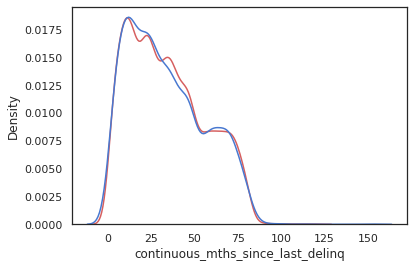

In [ ]:
ax1=sns.kdeplot(an_train['continuous_mths_since_last_delinq'][an_train['loan_status']==1],color='r')
ax2=sns.kdeplot(an_train['continuous_mths_since_last_delinq'][an_train['loan_status']==0],color='b')

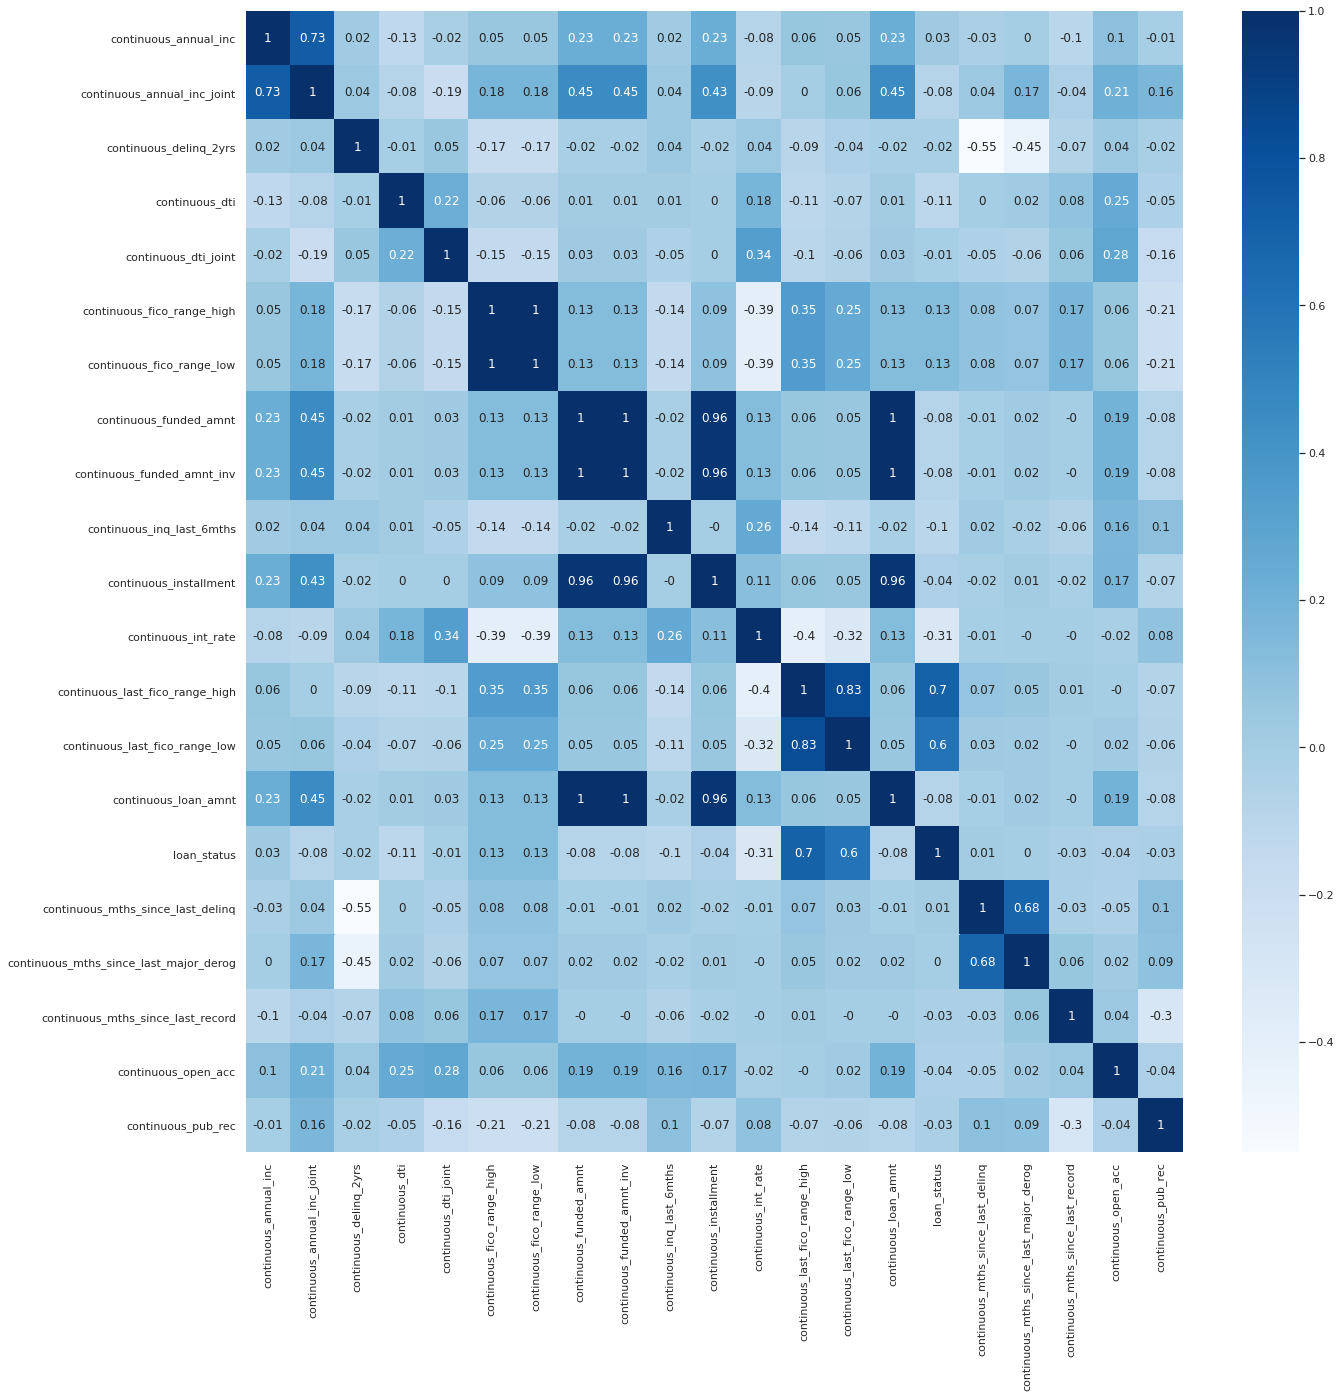

In [ ]:
plt.figure(figsize=(21,21))
sns.heatmap(round(an_train.corr(),2), cmap='Blues', annot=True)
plt.show()

### Add Param

In [ ]:
train1=train.copy()

train1['continuous_last_fico_range']=train1['continuous_fico_range_high']-train1['continuous_last_fico_range_high']

test1=test.copy()

test1['continuous_last_fico_range']=test1['continuous_fico_range_high']-test1['continuous_last_fico_range_high']

In [ ]:
train2=train.copy()

train2['continuous_last_fico_range']=train2['continuous_fico_range_high']-train2['continuous_last_fico_range_high']

train2['continuous_last_fico_rangel']=train2['continuous_fico_range_low']-train2['continuous_last_fico_range_low']
test2=test.copy()

test2['continuous_last_fico_range']=test2['continuous_fico_range_high']-test2['continuous_last_fico_range_high']
test2['continuous_last_fico_rangel']=test2['continuous_fico_range_low']-test2['continuous_last_fico_range_low']

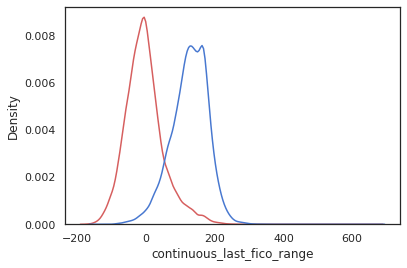

In [ ]:
ax1=sns.kdeplot(train1['continuous_last_fico_range'][train1['loan_status']==1],color='r')
ax2=sns.kdeplot(train1['continuous_last_fico_range'][train1['loan_status']==0],color='b')

### After

In [ ]:
train_pred, test_pred, acc_result, models = fitter.train_k_fold(kfold, train1, test1, params = params)

KeyError: ignored

In [ ]:
train_pred2, test_pred2, acc_result2, models2 = fitter.train_k_fold(kfold, train2, test2, params = params)

In [ ]:
acc_result

In [ ]:
basepre=pd.DataFrame((test_pred1 > 0.5).astype(int))
base_acc_count=0
for i in range(len(pre)):
  if basepre[0][i] == test['loan_status'][i]:
    base_acc_count += 1
resbase=base_acc_count/len(basepre)*1.0
print(resbase)

In [ ]:
pre = pd.DataFrame((test_pred > 0.5).astype(int))
acc_count=0
for i in range(len(pre)):
  if pre[0][i] == test1['loan_status'][i]:
    acc_count += 1
res1=acc_count/len(pre)*1.0
print(res1)

In [ ]:
pre2 = pd.DataFrame((test_pred2 > 0.5).astype(int))
acc_count2=0
for i in range(len(pre2)):
  if pre[0][i] == test2['loan_status'][i]:
    acc_count2 += 1
res2=acc_count2/len(pre2)*1.0
print(res2)

In [ ]:
res2-resbase

In [ ]:
res1-resbase